### Final Analysis
* The temperature vs latitude regressions predict that temperature rises as latitude increases. This scaling effect is higher when in lower latitudes. This observation is of course incorrect; high latitude areas will eventually drop in temperature. But considering the latitude limits within this study, perhaps there are other factors at play here. This set of observations had the strongest correlation factors calculated.
* The humidity vs latitude regressions show that humidity rises the closer the observation is to the equator. This somewhat matches up with my anecdotal evidence of personal experience. However I'm recalcitrant to put this forth as a concrete statement. There are multiple other factors at play in order to determine humidity.
* The cloudiness vs latitude regressions show that the equator experiences a notably higher percentage of cloud cover at the time of this study. I do not have a theory to explain this phenomena, however it no doubt is related to humidity and wind speed.

In [1]:
# import dependencies
import gmaps
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from citipy import citipy

In [2]:
# import api key
from api_keys import (wkey, gkey)

In [3]:
# import country code dictionary
from ISO3166 import ISO3166

In [4]:
# configure gmaps
gmaps.configure(api_key = gkey)

### Retrieve the Relevant City Names

In [5]:
# specify the +/- of latitude for the search criteria
latitudeRange = 30

# initialize the list of city names
cityNames = []
countryCodes = []

# iterate across the globe
for x in range(-180, 180, 6):
    
    # iterate through the specified latitude range
    for y in range(-latitudeRange, latitudeRange + 1, 3):
        city = citipy.nearest_city(y, x)
        cityName = city.city_name
        countryCode = city.country_code
        
        # add the new city to the cityNames list if it isn't already there
        if cityName not in cityNames:
            cityNames.append(cityName)
            countryCodes.append(countryCode)

print(f"A total of {len(cityNames)} cities have been retrieved.")

A total of 661 cities have been retrieved.


### Retrieve the Weather Data

In [6]:
# specify the unit types
units = "imperial"

# initialize the lists
temperature_Data = []
humidity_Data = []
cloudiness_Data = []
windSpeed_Data = []
latitude_Data = []
longitude_Data = []

# create the country name variable
countryName = ""

# iterate through the retrieved cities (limited during development)
#for i in range(20):
for i in range(len(cityNames)):
    
    # assign the country name
    try:
        countryName = ISO3166[countryCodes[i].upper()]
    except KeyError:
        countryName = {countryCodes[i]}
        print("Country code did not exist in the provided dictionary.")
    
    # construct the request URL with an f-string
    if units == "standard":
        url = f"https://api.openweathermap.org/data/2.5/weather?q={cityNames[i]},{countryCodes[i]}&appid={wkey}"
    else:
        url = f"https://api.openweathermap.org/data/2.5/weather?q={cityNames[i]},{countryCodes[i]}&appid={wkey}&units={units}"
    
    # perform the api request
    response_json = requests.get(url).json()
    
    try:
        # store the relevant output in their respective lists
        temperature_Data.append(response_json["main"]["temp"])
        humidity_Data.append(response_json["main"]["humidity"])
        cloudiness_Data.append(response_json["clouds"]["all"])
        windSpeed_Data.append(response_json["wind"]["speed"])
        latitude_Data.append(response_json["coord"]["lat"])
        longitude_Data.append(response_json["coord"]["lon"])
        
        # contribute to the print log
        print(f"City #{i}: {cityNames[i]}, {countryName}")
        
    except KeyError:
        print(f"City #{i}: key did not exist in the JSON object (City = {cityNames[i]}).")
    
    # constrain the request rate to ~57/minute
    time.sleep(1.05)

print(f"A total of {len(temperature_Data)} cities have been successfully analyzed.")

City #0: vaini, Tonga
City #1: key did not exist in the JSON object (City = halalo).
City #2: key did not exist in the JSON object (City = vaitupu).
City #3: kapaa, United States of America
City #4: neiafu, Tonga
City #5: key did not exist in the JSON object (City = hihifo).
City #6: key did not exist in the JSON object (City = falealupo).
City #7: alofi, Niue
City #8: key did not exist in the JSON object (City = satitoa).
City #9: key did not exist in the JSON object (City = samusu).
City #10: key did not exist in the JSON object (City = samalaeulu).
City #11: key did not exist in the JSON object (City = saleaula).
City #12: nanakuli, United States of America
City #13: avarua, Cook Iislands
City #14: hilo, United States of America
City #15: makakilo city, United States of America
City #16: key did not exist in the JSON object (City = avera).
City #17: vaitape, French Polynesia
City #18: faanui, French Polynesia
City #19: kahului, United States of America
City #20: kailua, United State

City #234: key did not exist in the JSON object (City = goderich).
City #235: oussouye, Senegal
City #236: dakar, Senegal
City #237: nouakchott, Mauritania
City #238: nouadhibou, Mauritania
City #239: santa cruz de la palma, Spain
City #240: harper, Liberia
City #241: buchanan, Liberia
City #242: robertsport, Liberia
City #243: masingbi, Sierra Leone
City #244: mali, Guinea
City #245: bakel, Senegal
City #246: key did not exist in the JSON object (City = bababe).
City #247: atar, Mauritania
City #248: puerto del rosario, Spain
City #249: teguise, Spain
City #250: tabou, Côte D'ivoire (Ivory Coast)
City #251: san-pedro, Côte D'ivoire (Ivory Coast)
City #252: gagnoa, Côte D'ivoire (Ivory Coast)
City #253: korhogo, Côte D'ivoire (Ivory Coast)
City #254: koutiala, Mali
City #255: sokolo, Mali
City #256: araouane, Mali
City #257: taoudenni, Mali
City #258: key did not exist in the JSON object (City = tarudant).
City #259: marrakesh, Morocco
City #260: port-gentil, Gabon
City #261: takoradi,

City #470: madras, India
City #471: yanam, India
City #472: srikakulam, India
City #473: sonepur, India
City #474: daltenganj, India
City #475: padrauna, India
City #476: pokhara, Nepal
City #477: carnarvon, Australia
City #478: bengkulu, Indonesia
City #479: padang, Indonesia
City #480: meulaboh, Indonesia
City #481: banda aceh, Indonesia
City #482: sabang, Indonesia
City #483: port blair, India
City #484: akyab, Myanmar
City #485: mathbaria, Bangladesh
City #486: mirzapur, Bangladesh
City #487: damphu, Bhutan
City #488: key did not exist in the JSON object (City = lasa).
City #489: key did not exist in the JSON object (City = palabuhanratu).
City #490: labuhan, Indonesia
City #491: sibolga, Indonesia
City #492: sigli, Indonesia
City #493: kathu, Thailand
City #494: key did not exist in the JSON object (City = mergui).
City #495: pyapon, Myanmar
City #496: letpadan, Myanmar
City #497: meiktila, Myanmar
City #498: key did not exist in the JSON object (City = katha).
City #499: margheri

### Display City Locations to Confirm Algorithm Accuracy

In [7]:
# create the locations DataFrame
locations = pd.DataFrame({
                    "Lat": latitude_Data,
                    "Lng": longitude_Data})

In [8]:
mapFig = gmaps.figure()

city_layer = gmaps.symbol_layer(
                locations,
                fill_color = "rgba(0, 150, 0, 0.4)",
                stroke_color = "rgba(0, 0, 150, 0.4)",
                scale = 2)

mapFig.add_layer(city_layer)
mapFig

Figure(layout=FigureLayout(height='420px'))

### Display the Weather Data

In [9]:
# specify the plot specific variables
markers = "o"
size = 15
color = "red"
edgeColors = "black"
regressionColor = "blue"
lineStyle = "-."

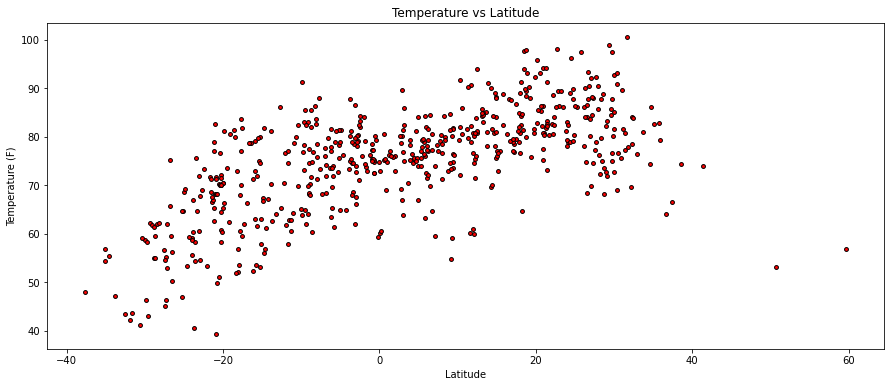

In [10]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            temperature_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitude")

# save the plot
plt.savefig("Images/Temperature vs Latitude.png")

# show the plot
plt.show()

This scatter plot displays the relationship between a city's latitudinal position and its current temperature. It shows a general trend of temperature to be higher at the equator and the lower positive latitudes.

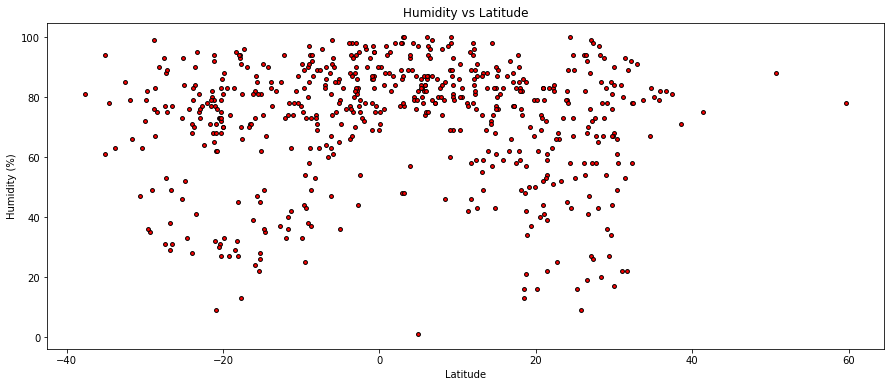

In [11]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            humidity_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")

# save the plot
plt.savefig("Images/Humidity vs Latitude.png")

# show the plot
plt.show()

This scatter plot displays the relationship between a city's latitudinal position and its current humidity. There doesn't appear to be a visible trend from this plot aside from the tendency of humidity to be higher across the board.

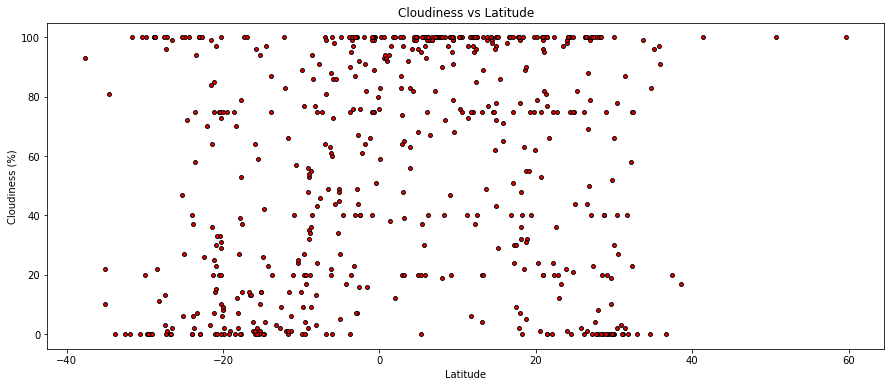

In [12]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            cloudiness_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")

# save the plot
plt.savefig("Images/Cloudiness vs Latitude.png")

# show the plot
plt.show()

This scatter plot displays the relationship between a city's latitudinal position and its current cloudiness. There doesn't appear to be a trend evident from this plot.

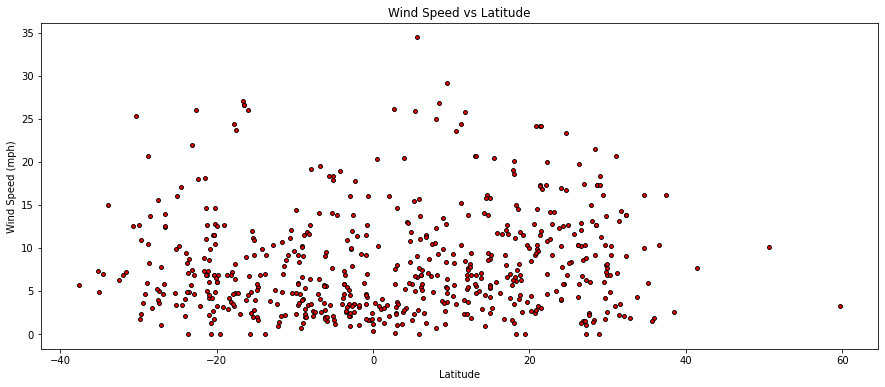

In [13]:
# specify the plot size
plt.figure(figsize = (15, 6))

# construct the plot
plt.scatter(latitude_Data,
            windSpeed_Data,
            marker = markers, 
            s = size,
            c = color,
            edgecolors = edgeColors)

# set up the labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitude")

# save the plot
plt.savefig("Images/Wind Speed vs Latitude.png")

# show the plot
plt.show()

This scatter plot displays the relationship between a city's latitudinal position and its current wind speed. This plot does not show an evident plot aside from the tendency for wind speeds to be lower across the board.

### Combine Lists into DataFrame

In [14]:
# combine the lists into a DataFrame to work better in a regression
weather_df = pd.DataFrame({
                        "Latitude": latitude_Data,
                        "Temperature (F)": temperature_Data,
                        "Humidity (%)": humidity_Data,
                        "Cloudiness (%)": cloudiness_Data,
                        "Wind Speed (mph)": windSpeed_Data})

# save the dataframe to file
weather_df.to_csv("Output/city_weather_data", index = False)

# create Northern hemisphere DataFrame
northern_df = weather_df.loc[weather_df["Latitude"] >= 0, :].reset_index()

# create Southern hemisphere DataFrame
southern_df = weather_df.loc[weather_df["Latitude"] < 0, :].reset_index()

# calculate the maximum and minimum y values
max_temperature = max(weather_df["Temperature (F)"])
min_temperature = min(weather_df["Temperature (F)"])
max_humidity = max(weather_df["Humidity (%)"])
min_humidity = min(weather_df["Humidity (%)"])
max_cloudiness = max(weather_df["Cloudiness (%)"])
min_cloudiness = min(weather_df["Cloudiness (%)"])
max_windspeed = max(weather_df["Wind Speed (mph)"])
min_windspeed = min(weather_df["Wind Speed (mph)"])

# define the margin factor
mFactor = 0.05

# add margins to the max/min values
max_temperature = max_temperature + mFactor * max_temperature
min_temperature = min_temperature - mFactor * min_temperature
max_humidity = max_humidity + mFactor * max_humidity
min_humidity = min_humidity - mFactor * min_humidity
max_cloudiness = max_cloudiness + mFactor * max_cloudiness
min_cloudiness = min_cloudiness - mFactor * min_cloudiness
max_windspeed = max_windspeed + mFactor * max_windspeed
min_windspeed = min_windspeed - mFactor * min_windspeed

In [15]:
# extract the x series for use in the linear regressions
x_values_northern = northern_df["Latitude"]
x_values_southern = southern_df["Latitude"]

# extract the y series for use in the linear regressions
y_values_northern_temperature = northern_df["Temperature (F)"]
y_values_northern_humidity = northern_df["Humidity (%)"]
y_values_northern_cloudiness = northern_df["Cloudiness (%)"]
y_values_northern_windspeed = northern_df["Wind Speed (mph)"]
y_values_southern_temperature = southern_df["Temperature (F)"]
y_values_southern_humidity = southern_df["Humidity (%)"]
y_values_southern_cloudiness = southern_df["Cloudiness (%)"]
y_values_southern_windspeed = southern_df["Wind Speed (mph)"]

### Perform the Linear Regressions (Temperature)

Southern Latitude =>	correlation = 0.64	r2 = 0.41
Northern Latitude =>	correlation = 0.21	r2 = 0.04


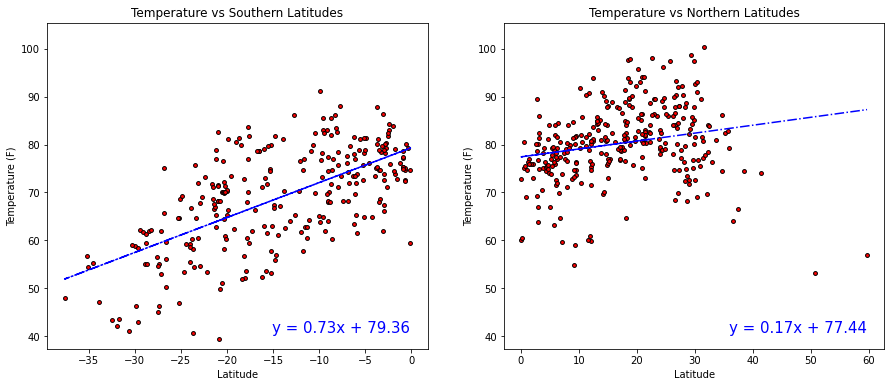

In [16]:
# define the line equation's position variables (% of axis)
x_northern_position = 0.60
x_southern_position = 0.60
y_position = 0.05

# reuse variables for easier reassignment
y_values_northern = y_values_northern_temperature
y_values_southern = y_values_southern_temperature
y_max = max_temperature
y_min = min_temperature
category = "Temperature"
categoryUnits = "(F)"

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = stats.linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = stats.linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# calculate the northern correlation factor
northern_correlation = stats.pearsonr(x_values_northern, y_values_northern)[0]
southern_correlation = stats.pearsonr(x_values_southern, y_values_southern)[0]

# print the correlation factors
print(f"Southern Latitude =>\tcorrelation = {southern_correlation:,.2f}\tr2 = {rvalueS**2:,.2f}")
print(f"Northern Latitude =>\tcorrelation = {northern_correlation:,.2f}\tr2 = {rvalueN**2:,.2f}")

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern_position
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern_position
y_position = y_min + (y_max - y_min) * y_position

# add the line equation
ax0.annotate(line_equationS, (x_position_southern, y_position), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationN, (x_position_northern, y_position), fontsize = 15, color = regressionColor)

# set up y axis limits
ax0.set_ylim(y_min, y_max)
ax1.set_ylim(y_min, y_max)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel(f"{category} {categoryUnits}")
ax0.set_title(f"{category} vs Southern Latitudes")
ax1.set_xlabel("Latitude")
ax1.set_ylabel(f"{category} {categoryUnits}")
ax1.set_title(f"{category} vs Northern Latitudes")

# save the plot
plt.savefig(f"Images/{category} vs Latitudes - Regression.png")

# show the plot
plt.show()

### Perform the Linear Regressions (Humidity)

Southern Latitude =>	correlation = 0.23	r2 = 0.05
Northern Latitude =>	correlation = -0.29	r2 = 0.09


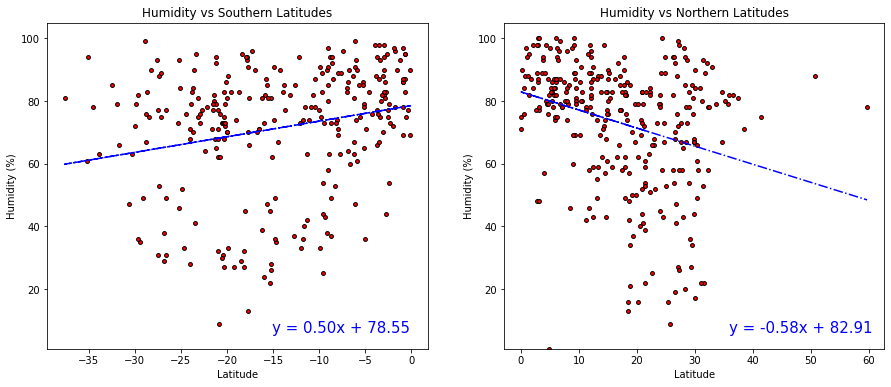

In [17]:
# define the line equation's position variables (% of axis)
x_northern_position = 0.60
x_southern_position = 0.60
y_position = 0.05

# reuse variables for easier reassignment
y_values_northern = y_values_northern_humidity
y_values_southern = y_values_southern_humidity
y_max = max_humidity
y_min = min_humidity
category = "Humidity"
categoryUnits = "(%)"

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = stats.linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = stats.linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# calculate the northern correlation factor
northern_correlation = stats.pearsonr(x_values_northern, y_values_northern)[0]
southern_correlation = stats.pearsonr(x_values_southern, y_values_southern)[0]

# print the correlation factors
print(f"Southern Latitude =>\tcorrelation = {southern_correlation:,.2f}\tr2 = {rvalueS**2:,.2f}")
print(f"Northern Latitude =>\tcorrelation = {northern_correlation:,.2f}\tr2 = {rvalueN**2:,.2f}")

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern_position
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern_position
y_position = y_min + (y_max - y_min) * y_position

# add the line equation
ax0.annotate(line_equationS, (x_position_southern, y_position), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationN, (x_position_northern, y_position), fontsize = 15, color = regressionColor)

# set up y axis limits
ax0.set_ylim(y_min, y_max)
ax1.set_ylim(y_min, y_max)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel(f"{category} {categoryUnits}")
ax0.set_title(f"{category} vs Southern Latitudes")
ax1.set_xlabel("Latitude")
ax1.set_ylabel(f"{category} {categoryUnits}")
ax1.set_title(f"{category} vs Northern Latitudes")

# save the plot
plt.savefig(f"Images/{category} vs Latitudes - Regression.png")

# show the plot
plt.show()

### Perform the Linear Regressions (Cloudiness)

Southern Latitude =>	correlation = 0.23	r2 = 0.05
Northern Latitude =>	correlation = -0.33	r2 = 0.11


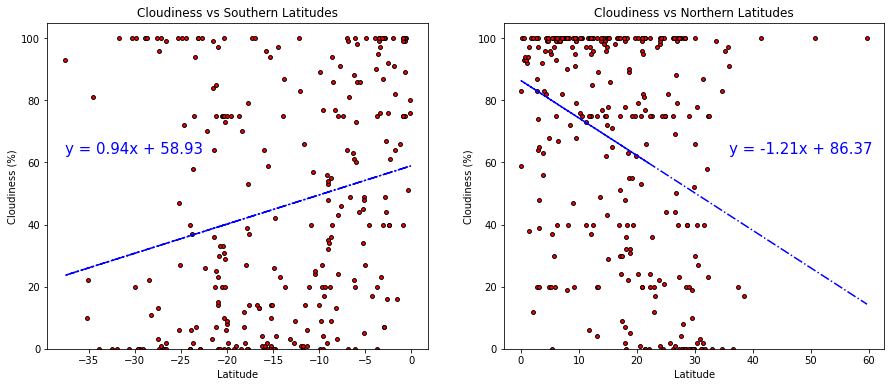

In [18]:
# define the line equation's position variables (% of axis)
x_northern_position = 0.60
x_southern_position = 0.00
y_position = 0.60

# reuse variables for easier reassignment
y_values_northern = y_values_northern_cloudiness
y_values_southern = y_values_southern_cloudiness
y_max = max_cloudiness
y_min = min_cloudiness
category = "Cloudiness"
categoryUnits = "(%)"

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = stats.linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = stats.linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# calculate the northern correlation factor
northern_correlation = stats.pearsonr(x_values_northern, y_values_northern)[0]
southern_correlation = stats.pearsonr(x_values_southern, y_values_southern)[0]

# print the correlation factors
print(f"Southern Latitude =>\tcorrelation = {southern_correlation:,.2f}\tr2 = {rvalueS**2:,.2f}")
print(f"Northern Latitude =>\tcorrelation = {northern_correlation:,.2f}\tr2 = {rvalueN**2:,.2f}")

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern_position
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern_position
y_position = y_min + (y_max - y_min) * y_position

# add the line equation
ax0.annotate(line_equationS, (x_position_southern, y_position), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationN, (x_position_northern, y_position), fontsize = 15, color = regressionColor)

# set up y axis limits
ax0.set_ylim(y_min, y_max)
ax1.set_ylim(y_min, y_max)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel(f"{category} {categoryUnits}")
ax0.set_title(f"{category} vs Southern Latitudes")
ax1.set_xlabel("Latitude")
ax1.set_ylabel(f"{category} {categoryUnits}")
ax1.set_title(f"{category} vs Northern Latitudes")

# save the plot
plt.savefig(f"Images/{category} vs Latitudes - Regression.png")

# show the plot
plt.show()

### Perform the Linear Regressions (Wind Speed)

Southern Latitude =>	correlation = -0.14	r2 = 0.02
Northern Latitude =>	correlation = 0.07	r2 = 0.00


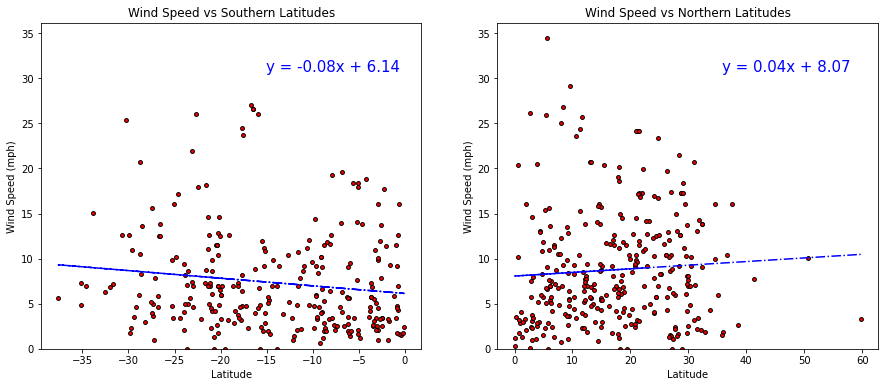

In [19]:
# define the line equation's position variables (% of axis)
x_northern_position = 0.60
x_southern_position = 0.60
y_position = 0.85

# reuse variables for easier reassignment
y_values_northern = y_values_northern_windspeed
y_values_southern = y_values_southern_windspeed
y_max = max_windspeed
y_min = min_windspeed
category = "Wind Speed"
categoryUnits = "(mph)"

# calculate the northern regression
(slopeN, interceptN, rvalueN, pvalueN, stderrN) = stats.linregress(x_values_northern, y_values_northern)
regress_valuesN = x_values_northern * slopeN + interceptN
line_equationN = f"y = {slopeN:,.2f}x + {interceptN:,.2f}"

# calculate the southern regression
(slopeS, interceptS, rvalueS, pvalueS, stderrS) = stats.linregress(x_values_southern, y_values_southern)
regress_valuesS = x_values_southern * slopeS + interceptS
line_equationS = f"y = {slopeS:,.2f}x + {interceptS:,.2f}"

# calculate the northern correlation factor
northern_correlation = stats.pearsonr(x_values_northern, y_values_northern)[0]
southern_correlation = stats.pearsonr(x_values_southern, y_values_southern)[0]

# print the correlation factors
print(f"Southern Latitude =>\tcorrelation = {southern_correlation:,.2f}\tr2 = {rvalueS**2:,.2f}")
print(f"Northern Latitude =>\tcorrelation = {northern_correlation:,.2f}\tr2 = {rvalueN**2:,.2f}")

# specify the subplots
fig0, (ax0, ax1) = plt.subplots(1, 2, figsize = (15, 6))

# construct the plots
ax0.scatter(x_values_southern,
                y_values_southern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax0.plot(x_values_southern,
                regress_valuesS,
                color = regressionColor,
                linestyle = lineStyle)
ax1.scatter(x_values_northern,
                y_values_northern,
                marker = markers, 
                s = size,
                c = color,
                edgecolors = edgeColors)
ax1.plot(x_values_northern,
                regress_valuesN,
                color = regressionColor,
                linestyle = lineStyle)

# calculate the position for the line equation
x_position_northern = min(x_values_northern) + (max(x_values_northern) - min(x_values_northern)) * x_northern_position
x_position_southern = min(x_values_southern) + (max(x_values_southern) - min(x_values_southern)) * x_southern_position
y_position = y_min + (y_max - y_min) * y_position

# add the line equation
ax0.annotate(line_equationS, (x_position_southern, y_position), fontsize = 15, color = regressionColor)
ax1.annotate(line_equationN, (x_position_northern, y_position), fontsize = 15, color = regressionColor)

# set up y axis limits
ax0.set_ylim(y_min, y_max)
ax1.set_ylim(y_min, y_max)

# set up the labels and title
ax0.set_xlabel("Latitude")
ax0.set_ylabel(f"{category} {categoryUnits}")
ax0.set_title(f"{category} vs Southern Latitudes")
ax1.set_xlabel("Latitude")
ax1.set_ylabel(f"{category} {categoryUnits}")
ax1.set_title(f"{category} vs Northern Latitudes")

# save the plot
plt.savefig(f"Images/{category} vs Latitudes - Regression.png")

# show the plot
plt.show()